Importerer biblioteker

In [123]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime

lager variabel (url) og gir den plasseringen til datafilen.
Lager en dataframe og bruker panda til å lese filen som en tabell

In [124]:
url = "C:/Users/henri/Downloads/flight.csv"
df = pd.read_csv(url)


Bruker panda til konvertere string til et to_datatime-objekt for å kunne utføre matematiske opperasjoner. det er nødvendig for å kunne finne delay og arival_time.

In [125]:
df['datetime_val'] = pd.to_datetime(df['datetime_val'], errors='coerce') 
df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce')
df['arr_time'] = pd.to_datetime(df['arr_time'], errors='coerce')
df['sched_arr_time'] = pd.to_datetime(df['sched_arr_time'], errors='coerce')
#or use errors='coerce' to put a NaT value (NaT = dummy var for missing value)


For hver rad hvor flyet landet neste dag legges til en dag for arrival time.

In [126]:
for index, row in df.iterrows():

    if (row['arr_time']<row['dep_time']):
        df.loc[index, 'arr_time'] = (row['arr_time'])+ datetime.timedelta(days=1)
    if (row['sched_arr_time']<row['dep_time']):
        df.loc[index, 'sched_arr_time'] = (row['sched_arr_time'])+ datetime.timedelta(days=1)

Lager to nye kolonner (air_time og delay). 

In [127]:
df['air_time'] = df["arr_time"]-df["dep_time"]
df['delay'] = df["arr_time"]-df["sched_arr_time"]

In [128]:
df

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00
...,...,...,...,...,...,...,...,...,...,...
121422,123979,2013-09-30 21:37:00,2013-09-30 21:47:00,2013-10-01 00:30:00,2013-10-01 00:27:00,1371,LGA,FLL,0 days 02:43:00,0 days 00:03:00
121423,123980,2013-09-30 21:56:00,2013-09-30 21:49:00,2013-09-30 22:45:00,2013-09-30 23:08:00,523,EWR,BOS,0 days 00:56:00,-1 days +23:37:00
121424,123981,2013-09-30 21:13:00,2013-09-30 22:33:00,2013-10-01 01:12:00,2013-10-01 00:30:00,471,EWR,SFO,0 days 02:39:00,0 days 00:42:00
121425,123982,2013-09-30 20:01:00,2013-09-30 22:35:00,2013-10-01 00:59:00,2013-09-30 22:49:00,1083,JFK,MCO,0 days 02:24:00,0 days 02:10:00


Beregner forsinkelse i prosent

In [131]:
df["percent_delay"] = (100 * df['delay'])/df['air_time']

Viser de fem første radene

In [132]:
df.head()

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay,percent_delay
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,14.932127
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00,-18.115942
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,11.320755
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,9.595960
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00,-4.968944


Viser statistikk for tidsforsinkelse i prosent.
Tidsforsinkelsen er egentlig tidsavvik fordi det er tatt med negative tidsforsinkelser.

In [133]:
df["percent_delay"].describe()

count    121373.000000
mean        -29.735566
std         206.591444
min       -2919.565217
25%         -14.838710
50%          -4.864865
75%           6.172840
max         100.000000
Name: percent_delay, dtype: float64

Viser tidforsinkelse som plotboks

<Axes: >

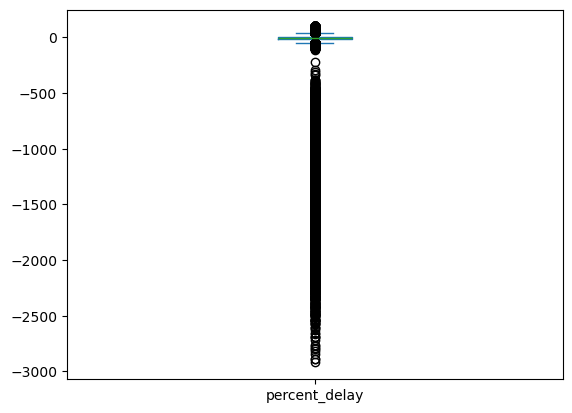

In [134]:
df["percent_delay"].plot.box()

Lager er funskjon som fjerner verdier som er ekstreme.

In [135]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df

Bruker funksjonen for kolonnen precent_delay 

In [136]:
df["percent_delay"] = remove_outlier(df["percent_delay"])

Viser statistikk for den filtrete dataen

In [139]:
df["percent_delay"].describe()

count    109235.000000
mean         -3.763476
std          15.290651
min         -39.333333
25%         -13.636364
50%          -4.864865
75%           4.694836
max          42.424242
Name: percent_delay, dtype: float64